# Combining and reducing the ASAS-SN data



In [25]:
import numpy as np
import matplotlib.pyplot as plt


In [39]:
from astropy.table import Table, vstack, unique
from pathlib import Path
from astropy.io import ascii

# output table
#t = Table(data=None,names=('MJD','gmag','gmag_err','obs'),dtype=('f','f','f','str'))
t=Table()
for filename in Path('./').rglob('light_curve*.csv'):
    print(filename)
    tin = ascii.read(filename)
    t = vstack([t,tin])

print(t)
# remove duplicates
t = unique(t,'HJD')
t.sort('HJD')
t['MJD'] = t['HJD']-2400000.5


light_curve_bb61d0ed-b07f-4e87-8881-769866dd896e.csv
light_curve_03ce0bc8-42ef-48f4-a463-ce657f0bf77a.csv
light_curve_b4508c12-b04a-467c-9e20-6881885cf0fb.csv
     HJD           UT Date       Camera FWHM ... flux(mJy) flux_err Filter
------------- ------------------ ------ ---- ... --------- -------- ------
2456590.00586 2013-10-24.5041408     ba 2.13 ...     99.99    99.99      V
2456590.00725 2013-10-24.5055217     ba 2.13 ...    12.687    0.337      V
2456600.98902 2013-11-04.4867956     ba 2.21 ...    12.147    0.214      V
 2456600.9904 2013-11-04.4881665     ba 2.23 ...    13.364    0.222      V
2456603.98523 2013-11-07.4828857     ba 2.33 ...     10.44    1.003      V
2456603.98661 2013-11-07.4842576     ba 2.34 ...    13.605    0.508      V
 2456615.9139 2013-11-19.4111166     ba 2.45 ...    10.355    0.531      V
  2456616.914 2013-11-20.4111902     ba 2.47 ...    14.718    0.517      V
2456616.91538 2013-11-20.4125663     ba 2.46 ...     13.04     0.54      V
2456618.89508 20

In [40]:
t

HJD,UT Date,Camera,FWHM,Limit,mag,mag_err,flux(mJy),flux_err,Filter,MJD
float64,str18,str2,float64,float64,str7,float64,float64,float64,str1,float64
2456590.00586,2013-10-24.5041408,ba,2.13,99.99,99.990,99.99,99.99,99.99,V,56589.50585999992
2456590.00725,2013-10-24.5055217,ba,2.13,15.94,13.702,0.029,12.687,0.337,V,56589.50724999979
2456600.98902,2013-11-04.4867956,ba,2.21,16.432,13.748,0.019,12.147,0.214,V,56600.48902000021
2456600.9904,2013-11-04.4881665,ba,2.23,16.391,13.645,0.018,13.364,0.222,V,56600.49040000001
2456603.98523,2013-11-07.4828857,ba,2.33,14.747,13.913,0.106,10.44,1.003,V,56603.485230000224
2456603.98661,2013-11-07.4842576,ba,2.34,15.493,13.626,0.041,13.605,0.508,V,56603.48661000002
2456615.9139,2013-11-19.4111166,ba,2.45,15.415,13.922,0.057,10.355,0.531,V,56615.41390000004
2456616.914,2013-11-20.4111902,ba,2.47,15.465,13.540,0.038,14.718,0.517,V,56616.41399999987
2456616.91538,2013-11-20.4125663,ba,2.46,15.404,13.672,0.045,13.04,0.54,V,56616.41538000014


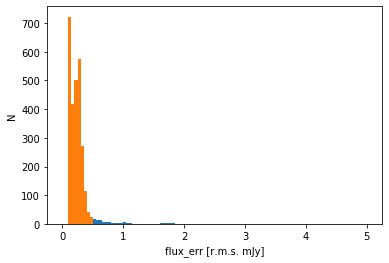

In [41]:

plt.hist(t['flux_err'],bins=100, range=(0,5));
plt.xlabel('flux_err [r.m.s. mJy]')
plt.ylabel('N')

# reject points with noise > 0.5 mJy
noise_rej = 0.5

s = t[t['flux_err']<noise_rej]

plt.hist(s['flux_err'],bins=100, range=(0,5));


Text(0, 0.5, 'Flux [mJy]')

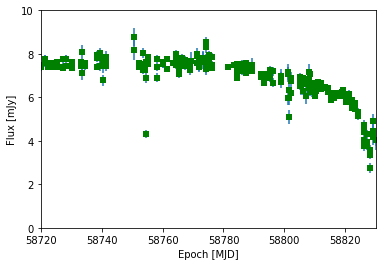

In [46]:
plt.errorbar(s['MJD'],s['flux(mJy)'],yerr=s['flux_err'],marker='s',
                 mec='green', ms=2, mew=4, fmt='.')
plt.xlim(58720,58830)
plt.ylim(0,10)
plt.xlabel('Epoch [MJD]')
plt.ylabel('Flux [mJy]')

# continuum points in the light curve
##con = s[s['MJD']<58780]
##mean_flux = con['flux(mJy)'].mean()

##plt.hlines(mean_flux,58800,58830);

In [47]:
t.write('asas.ecsv', format='ascii.ecsv', overwrite=True)